<a href="https://colab.research.google.com/github/4graf/Data_Processing/blob/main/ML/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = np.array([1, 3, -5, 7])
x_prime = np.array([2, -4, 0, 8])

def d(x, x_prime, q):
    if np.isinf(q):
        return max(np.abs(x-x_prime))
    else:
        return (sum(np.abs(x-x_prime)**q))**(1/q)

# 1 - манхэттенское, 2 - евклидово, inf - Чебышёва
print(f'{d(x, x_prime, 1)}\n{d(x, x_prime, 2)}\n{d(x, x_prime, np.inf)}')

14.0
8.717797887081348
7


In [ ]:
# ! touch 1.txt

In [ ]:
# ! mv 1.txt 1.csv

sum weights of class 0 = 0.007891374250530072
sum weights of class 1 = 0.00944156274141927


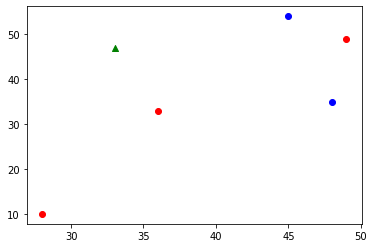

In [ ]:
df = pd.read_csv('1.csv', delimiter='\t', index_col='id')
X = df['X']
Y = df['Y']

XY = df[['X', 'Y']]
XY_1 = XY.loc[df['Class'] == 1]
XY_0 = XY.loc[df['Class'] == 0]

new_obj = np.array([33, 47])

# plt.rcParams['figure.figsize'] = (6, 4)
plt.scatter(XY_0['X'], XY_0['Y'], c='b')
plt.scatter(XY_1['X'], XY_1['Y'], c='r')
plt.scatter(new_obj[0], new_obj[1], c='g', marker='^')

distances = [d(pred, new_obj, 2) for pred in XY.values]
df_dist = df.copy()
df_dist['distance_new'] = distances
df_dist.sort_values(by='distance_new', inplace=True)
df_dist['weight'] = 1/df_dist['distance_new']**2

for cl in df_dist['Class'].unique():
    print(f'sum weights of class {cl} = {df_dist["weight"].loc[df_dist["Class"] == cl].sum()}')

In [ ]:
((6/30)*(30/70)) / (11/70)

0.5454545454545455

In [ ]:
p_spam = 11/37
print(f'{p_spam=}')

p_not_spam = 26/37
print(f'{p_not_spam=}')

p_spam=0.2972972972972973
p_not_spam=0.7027027027027027


In [ ]:
print(p_spam_win := (1+6)/(8+1+69)) # win
print(p_spam_million := (1+10)/(8+1+69)) # million
print(p_spam_dollars := (1+0)/(8+1+69)) # dollars

0.08974358974358974
0.14102564102564102
0.01282051282051282


In [ ]:
print(p_not_spam_win := (1+3)/(8+1+48)) # win
print(p_not_spam_million := (1+5)/(8+1+48)) # million
print(p_not_spam_dollars := (1+0)/(8+1+48)) # dollars

0.07017543859649122
0.10526315789473684
0.017543859649122806


In [ ]:
f_spam = np.log(p_spam) + np.log(p_spam_win) + np.log(p_spam_million) + np.log(p_spam_dollars)
f_not_spam = np.log(p_not_spam) + np.log(p_not_spam_win) + np.log(p_not_spam_million) + np.log(p_not_spam_dollars)
print('Спам F =', f_spam) 
print('Не спам F =', f_not_spam)

p_prediction_spam = 1/(1+np.exp(-f_spam+f_not_spam))
print('Вероятность \'win million dollars\' спам =', p_prediction_spam)

Спам F = -9.939343698060945
Не спам F = -9.303921347778449
Вероятность 'win million dollars' спам = 0.34628205512583726


In [ ]:
11/37


-1.213022639845854

# SKLEARN

In [ ]:
# ! touch task.txt

In [ ]:
# ! mv task.txt task.csv

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('task.csv', index_col='id')
X = df[['X', 'Y']]
X = X.to_numpy().reshape(-1, len(X.columns))
y = df['Class']
test = np.array([94, 37])
test = test.reshape(-1, len(test))
df


,X,Y,Class
id,,,
1,61,48,1
2,62,28,1
3,83,84,0
4,68,24,1
5,56,39,1
6,32,95,1
7,99,14,1
8,87,64,0
9,44,35,0


In [ ]:
neigh = KNeighborsClassifier(p=2)
neigh.fit(X, y)

neigh.kneighbors(test, 3)

(array([[23.53720459, 27.78488798, 27.89265136]]), array([[6, 9, 7]]))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3, p=2)
neigh.fit(X, y)

neigh.predict(test)

array([0])

In [ ]:
neigh = KNeighborsClassifier(p=1)
neigh.fit(X, y)

neigh.kneighbors(test, 3)

(array([[28., 34., 38.]]), array([[6, 7, 9]]))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3, p=1)
neigh.fit(X, y)

neigh.predict(test)

array([0])

# НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР

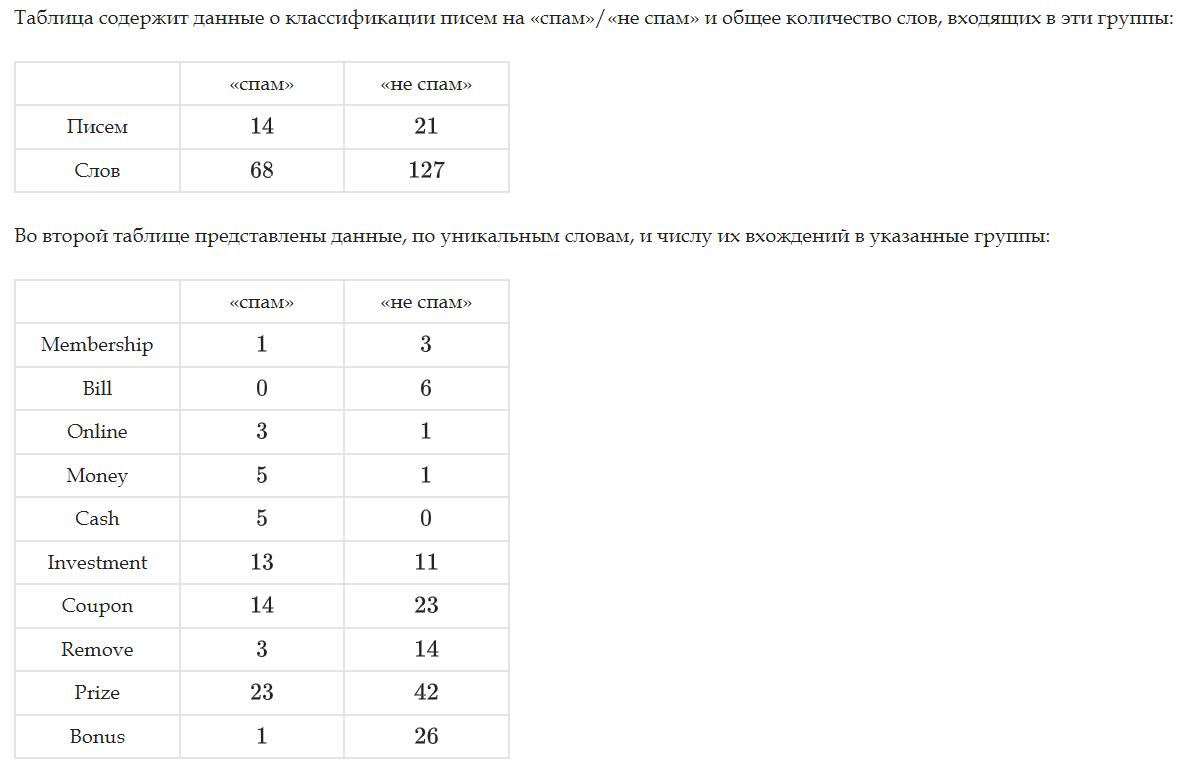

In [ ]:
p_spam = 14/35
p_not_spam = 1 - p_spam
print(f'{p_spam=}\n{p_not_spam=}')

p_spam=0.4
p_not_spam=0.6


In [ ]:
def p_x(count_x, count_dict_words, count_missing_words, count_occurring_words):
    return (1+count_x)/(count_dict_words+count_missing_words+count_occurring_words)

p_x_spam = [p_x(14, 10, 2, 68), p_x(3, 10, 2, 68), p_x(0, 10, 2, 68), 
          p_x(13, 10, 2, 68), p_x(3, 10, 2, 68), p_x(1, 10, 2, 68), 
          p_x(0, 10, 2, 68)]

p_x_not_spam = [p_x(23, 10, 2, 127), p_x(1, 10, 2, 127), p_x(0, 10, 2, 127),
                p_x(11, 10, 2, 127), p_x(14, 10, 2, 127), p_x(26, 10, 2, 127),
                p_x(0, 10, 2, 127)]

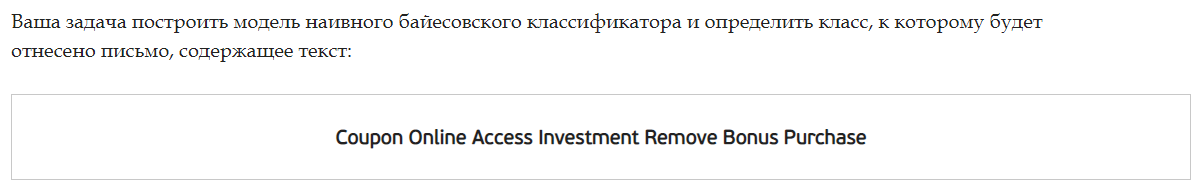

In [ ]:
f_spam = np.log(p_spam) + sum(map(np.log, p_x_spam))
f_not_spam = np.log(p_not_spam) + sum(map(np.log, p_x_not_spam))

print(f'{f_spam=}\n{f_not_spam=}')

p_predict_spam = 1/(1+np.exp(-f_spam+f_not_spam))

print(f'{p_predict_spam=}\n')

f_spam=-22.77763374107413
f_not_spam=-22.692148427878404
p_predict_spam=0.4786416768710148

